In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("C:/Users/Fabian/Downloads/wage2015_subsample_inference.csv", encoding="utf-8")

In [3]:
df

,rownames,wage,lwage,sex,shs,hsg,scl,clg,ad,mw,...,we,ne,exp1,exp2,exp3,exp4,occ,occ2,ind,ind2
0,10,9.615385,2.263364,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,7.0,0.49,0.343,0.2401,3600.0,11,8370.0,18
1,12,48.076923,3.872802,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,31.0,9.61,29.791,92.3521,3050.0,10,5070.0,9
2,15,11.057692,2.403126,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,18.0,3.24,5.832,10.4976,6260.0,19,770.0,4
3,18,13.942308,2.634928,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,25.0,6.25,15.625,39.0625,420.0,1,6990.0,12
4,19,28.846154,3.361977,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,22.0,4.84,10.648,23.4256,2015.0,6,9470.0,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5145,32620,14.769231,2.692546,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,9.0,0.81,0.729,0.6561,4700.0,16,4970.0,9
5146,32624,23.076923,3.138833,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,12.0,1.44,1.728,2.0736,4110.0,13,8680.0,20
5147,32626,38.461538,3.649659,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,11.0,1.21,1.331,1.4641,1550.0,4,3680.0,6
5148,32631,32.967033,3.495508,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,10.0,1.00,1.000,1.0000,2920.0,9,6570.0,11


In [4]:
# Subdataframe que agrupa a todos las instancias que cumplen:
# Educación superior incompleta
df_scl = df.loc[df["scl"] == 1]
df_scl.shape

(1432, 21)

In [5]:
# Subdataframe que agrupa a todas las instancias que cumplen:
# Educación superior finalizada
df_clg = df.loc[df["clg"] == 1]
df_clg.shape

(1636, 21)

In [6]:
# Agrupamos los datos de los dos anteriores dataframes para
# obtner nuestra muestra de interés (personas que cumplen con:
# grado mínimo de instrucción = Educación superior incompleta)
sample = pd.concat([df_scl, df_clg])
sample

,rownames,wage,lwage,sex,shs,hsg,scl,clg,ad,mw,...,we,ne,exp1,exp2,exp3,exp4,occ,occ2,ind,ind2
12,84,12.019231,2.486508,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,5.5,0.3025,0.166375,0.091506,3600.0,11,8270.0,18
13,89,13.461538,2.599837,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,20.5,4.2025,8.615125,17.661006,3645.0,11,8190.0,18
17,119,8.653846,2.158004,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,3.5,0.1225,0.042875,0.015006,7410.0,20,570.0,3
20,135,10.683761,2.368725,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,6.5,0.4225,0.274625,0.178506,4300.0,15,8590.0,19
21,144,11.538462,2.445686,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,8.5,0.7225,0.614125,0.522006,3600.0,11,8190.0,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5139,32593,21.153846,3.051822,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,28.0,7.8400,21.952000,61.465600,40.0,1,9170.0,21
5140,32596,45.546559,3.818735,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,5.0,0.2500,0.125000,0.062500,3255.0,10,8190.0,18
5143,32606,24.038462,3.179655,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,17.0,2.8900,4.913000,8.352100,2550.0,8,9480.0,22
5144,32619,13.846154,2.628007,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,10.0,1.0000,1.000000,1.000000,800.0,2,770.0,4


Text(0.5, 1.0, 'Distribución de los log(salarios)')

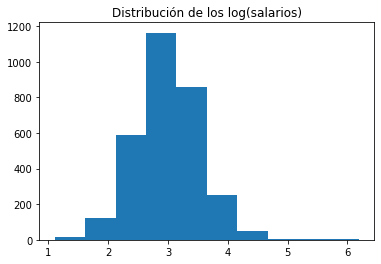

In [7]:
plt.hist(sample["lwage"])
plt.title("Distribución de los log(salarios)")

Text(0.5, 1.0, 'Distribución del log(salario)')

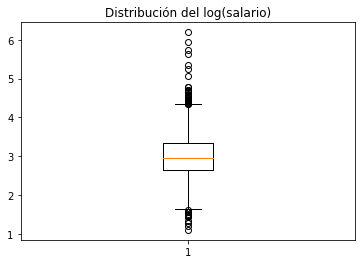

In [8]:
plt.boxplot(sample["lwage"])
plt.title("Distribución del log(salario)")

Text(0.5, 0, 'Experiencia')

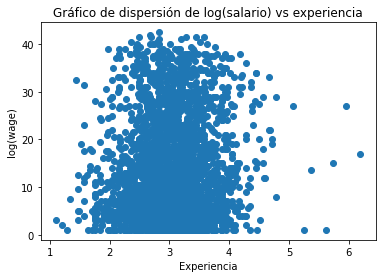

In [9]:
plt.scatter(sample["lwage"], sample["exp1"])
plt.title("Gráfico de dispersión de log(salario) vs experiencia")
plt.ylabel("log(wage)")
plt.xlabel("Experiencia")

In [10]:
# pip install statsmodels
# pip install scipy
import statsmodels.formula.api as smf
from scipy import stats

In [11]:
formula = "lwage ~ sex + exp1 + shs + hsg + mw + so + we + occ2 + ind2"
formula

'lwage ~ sex + exp1 + shs + hsg + mw + so + we + occ2 + ind2'

In [12]:
linear_m = smf.ols(formula, data=sample)
linear_m = linear_m.fit()
print(linear_m.summary())

                            OLS Regression Results                            
Dep. Variable:                  lwage   R-squared:                       0.128
Model:                            OLS   Adj. R-squared:                  0.126
Method:                 Least Squares   F-statistic:                     64.30
Date:                Sun, 12 Jun 2022   Prob (F-statistic):           1.07e-86
Time:                        01:31:47   Log-Likelihood:                -2277.3
No. Observations:                3068   AIC:                             4571.
Df Residuals:                    3060   BIC:                             4619.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.4366      0.038     90.407      0.0

In [13]:
formula_flex = "lwage ~ sex + (exp1 + exp2 + exp3 + exp4 + shs + hsg + occ2 + ind2 + mw + so + we) ** 2"
formula_flex

'lwage ~ sex + (exp1 + exp2 + exp3 + exp4 + shs + hsg + occ2 + ind2 + mw + so + we) ** 2'

In [14]:
linear_m_flex = smf.ols(formula_flex, data=sample)
linear_m_flex = linear_m_flex.fit()
print(linear_m_flex.summary())

                            OLS Regression Results                            
Dep. Variable:                  lwage   R-squared:                       0.144
Model:                            OLS   Adj. R-squared:                  0.133
Method:                 Least Squares   F-statistic:                     12.73
Date:                Sun, 12 Jun 2022   Prob (F-statistic):           1.59e-75
Time:                        01:31:51   Log-Likelihood:                -2249.3
No. Observations:                3068   AIC:                             4581.
Df Residuals:                    3027   BIC:                             4828.
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.6148      0.172     21.030      0.0

In [15]:
linear_m_flex.params

Intercept    3.614783
sex         -0.086538
exp1        -0.063376
exp2         1.101825
exp3        -0.007706
               ...   
ind2:so     -0.002426
ind2:we     -0.002719
mw:so        0.000000
mw:we        0.000000
so:we        0.000000
Length: 68, dtype: float64

In [16]:
# Para el modelo básico
# Valor estimado del coeficiente para la variable sexo:
lm_coef_sex = linear_m.params[1]
print(lm_coef_sex)

# Límite inferior del intervalo de confianza para la variable sexo:
linear_m.conf_int()[0][1]

# El error será:
error = lm_coef_sex - linear_m.conf_int()[0][1]
error

# Como es simétrico la distancia entre el intervalo superior
# e inferior con respecto al estimado son iguales


-0.08527332425721985


0.03696281774615673

In [17]:
# Para el modelo flexible:
# Valor estimado del coeficiente para la variable sexo:
lm_flex_coef_sex = linear_m_flex.params[1]

# Límite inferior del intervalo de confianza para la variable sexo:
linear_m_flex.conf_int()[0][1]

# El error será:
error_flex = lm_flex_coef_sex - linear_m_flex.conf_int()[0][1]
error_flex


0.0370593454564902

In [18]:
coef_df = pd.DataFrame({"coef": [lm_coef_sex, lm_flex_coef_sex],
                        "err": [error, error_flex],
                        "varname": ["basic_model", "flexible_model"]})
coef_df

,coef,err,varname
0,-0.085273,0.036963,basic_model
1,-0.086538,0.037059,flexible_model


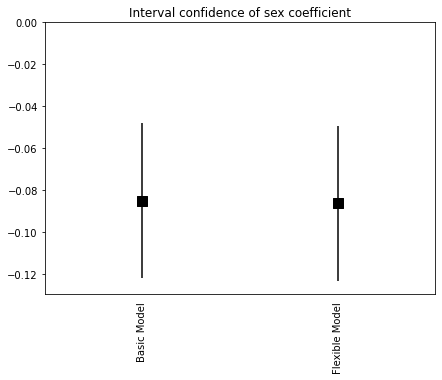

In [19]:
fig, ax = plt.subplots(figsize=(7, 5))
coef_df.plot(x="varname", y="coef", kind="bar",
            ax=ax, color="none", yerr="err",
            legend=False)
plt.title("Interval confidence of sex coefficient")
ax.set_ylabel("")
ax.set_xlabel("")
ax.scatter(x=np.arange(coef_df.shape[0]), marker="s",
           s=120, y=coef_df["coef"], color="black")
ax.xaxis.set_ticks_position("none")
_ = ax.set_xticklabels(["Basic Model", "Flexible Model"],
                      rotation=90, fontsize=10)
           

In [20]:
# df_scl
# df_clg

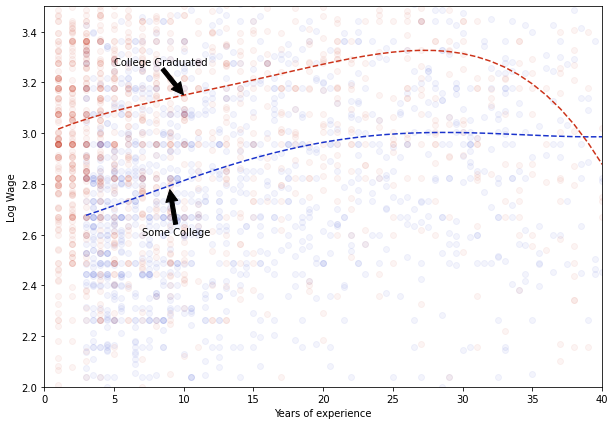

In [21]:
fig, ax = plt.subplots(figsize=(10, 7))

ax = plt.gca()
ax.set_ylim([2, 3.5])
ax.set_xlim([0, 40])


plt.scatter(df_scl["exp1"], df_scl["lwage"], color=(0.1, 0.2, 0.8, 0.05), label="_nolegend_")

z = np.polyfit(df_scl["exp1"], df_scl["lwage"], 4)
p = np.poly1d(z)

linea_re= pd.DataFrame({"x": df_scl["exp1"],
                        "y": p(df_scl["exp1"])})

linea_re = linea_re.sort_values(by='x', ascending=True)

plt.plot(linea_re["x"], linea_re["y"], "--", color=(0.1, 0.2, 0.8))

ax.annotate('College Graduated',
            xy =(10, 3.15),
            xytext =(5, 3.27),
            arrowprops = dict(facecolor ='black', shrink = 0.01),)




plt.scatter(df_clg["exp1"], df_clg["lwage"], color=(0.8, 0.2, 0.1, 0.05), label="_nolegend_")

z = np.polyfit(df_clg["exp1"], df_clg["lwage"], 4)
p = np.poly1d(z)


linea_re= pd.DataFrame({"x": df_clg["exp1"],
                        "y": p(df_clg["exp1"])})

linea_re = linea_re.sort_values(by='x', ascending=True)

plt.plot(linea_re["x"], linea_re["y"], "--", color=(0.8, 0.2, 0.1))


ax.annotate('Some College',
            xy =(9, 2.779),
            xytext =(7, 2.6),
            arrowprops = dict(facecolor ='black', shrink = 0.01),)




plt.ylabel("Log Wage")
plt.xlabel("Years of experience")

plt.show()

In [22]:
from sympy import symbols, expand

In [23]:
# lwage ~ sex + (exp1 + exp2 + exp3 + exp4 + shs + hsg + occ2 + ind2 + mw + so + we)^2

In [24]:
s = ["exp1", "exp2", "exp3", "exp4", "shs", "hsg", "occ2", "ind2", "mw", "so", "we"]

exp1 = symbols("exp1")
exp2 = symbols("exp2")
exp3 = symbols("exp3")
exp4 = symbols("exp4")
shs = symbols("shs")
hsg = symbols("hsg")
occ2 = symbols("occ2")
ind2 = symbols("ind2")
mw = symbols("mw")
so = symbols("so")
we = symbols("we")


In [27]:
expression = expand((exp1 + exp2 + exp3 + exp4 + shs + hsg + occ2 + ind2 + mw + so + we)**2)
expression

exp1**2 + 2*exp1*exp2 + 2*exp1*exp3 + 2*exp1*exp4 + 2*exp1*hsg + 2*exp1*ind2 + 2*exp1*mw + 2*exp1*occ2 + 2*exp1*shs + 2*exp1*so + 2*exp1*we + exp2**2 + 2*exp2*exp3 + 2*exp2*exp4 + 2*exp2*hsg + 2*exp2*ind2 + 2*exp2*mw + 2*exp2*occ2 + 2*exp2*shs + 2*exp2*so + 2*exp2*we + exp3**2 + 2*exp3*exp4 + 2*exp3*hsg + 2*exp3*ind2 + 2*exp3*mw + 2*exp3*occ2 + 2*exp3*shs + 2*exp3*so + 2*exp3*we + exp4**2 + 2*exp4*hsg + 2*exp4*ind2 + 2*exp4*mw + 2*exp4*occ2 + 2*exp4*shs + 2*exp4*so + 2*exp4*we + hsg**2 + 2*hsg*ind2 + 2*hsg*mw + 2*hsg*occ2 + 2*hsg*shs + 2*hsg*so + 2*hsg*we + ind2**2 + 2*ind2*mw + 2*ind2*occ2 + 2*ind2*shs + 2*ind2*so + 2*ind2*we + mw**2 + 2*mw*occ2 + 2*mw*shs + 2*mw*so + 2*mw*we + occ2**2 + 2*occ2*shs + 2*occ2*so + 2*occ2*we + shs**2 + 2*shs*so + 2*shs*we + so**2 + 2*so*we + we**2